In [1]:
import math

import matplotlib.pyplot as plt
import spatialdata
import spatialdata_plot  # noqa: F401
from spatialdata.transformations import (
    Affine,
    MapAxis,
    Scale,
    Sequence,
    Translation,
    get_transformation,
    set_transformation,
)

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [3]:
sdata = spatialdata.read_zarr("mouse_liver.zarr")
sdata

/opt/miniconda3/envs/Summer2025/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /Users/kevin/Documents/Summer2025/mouse_liver.zarr
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 6432, 6432), (1, 1608, 1608)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (6432, 6432)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3375, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (3375, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


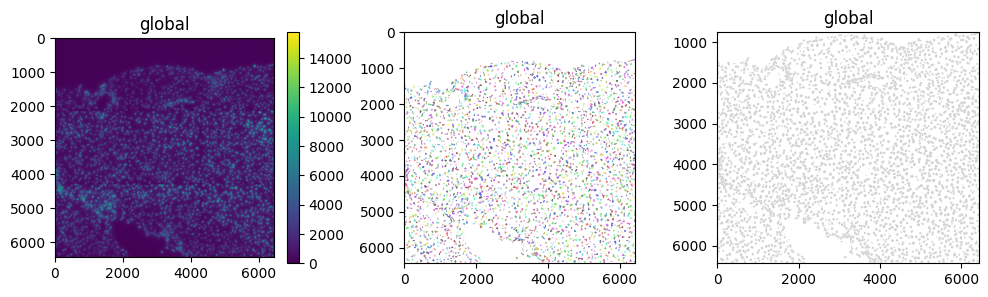

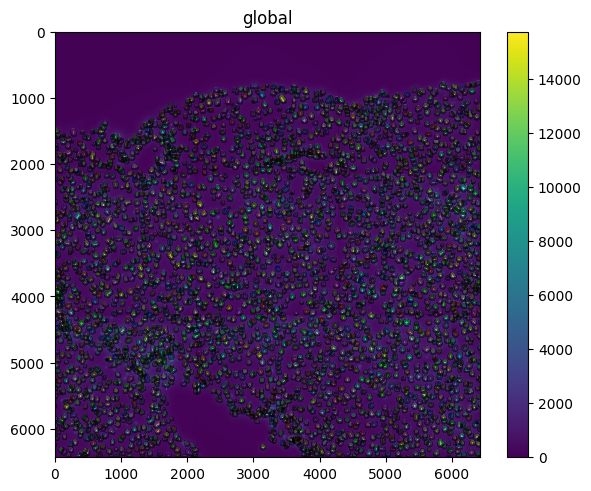

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

sdata.pl.render_images().pl.show(ax=axs[0])
sdata.pl.render_labels().pl.show(ax=axs[1])
sdata.pl.render_shapes().pl.show(ax=axs[2])

sdata.pl.render_images().pl.render_labels().pl.render_shapes(fill_alpha=0, outline_alpha=0.5).pl.show()

In [9]:
print(sdata.coordinate_systems)
print(
    get_transformation(sdata["raw_image"]),
    get_transformation(sdata["segmentation_mask"]),
    get_transformation(sdata["nucleus_boundaries"]),
)

['global']
Identity  Identity  Identity 


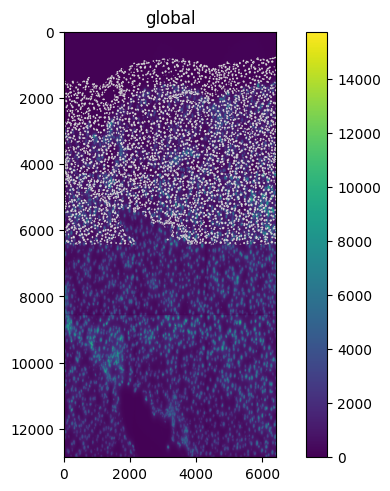

In [10]:
scale = Scale([2.0], axes=("y", ))

set_transformation(sdata.images["raw_image"], scale, to_coordinate_system="global")

sdata.pl.render_images().pl.render_shapes().pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


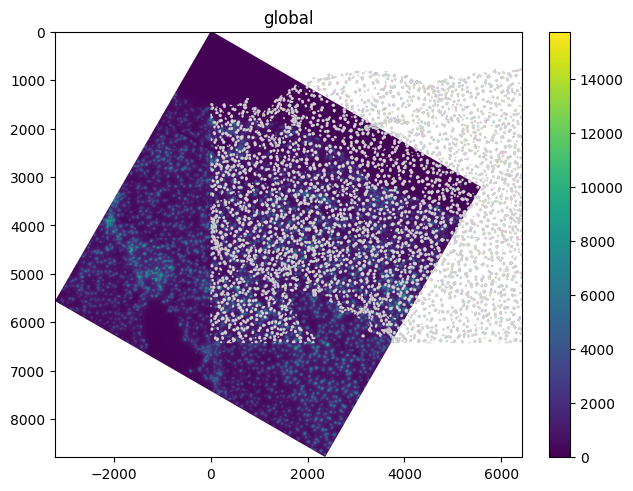

In [11]:
theta = math.pi / 6
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(sdata.images["raw_image"], rotation, to_coordinate_system="global")
sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


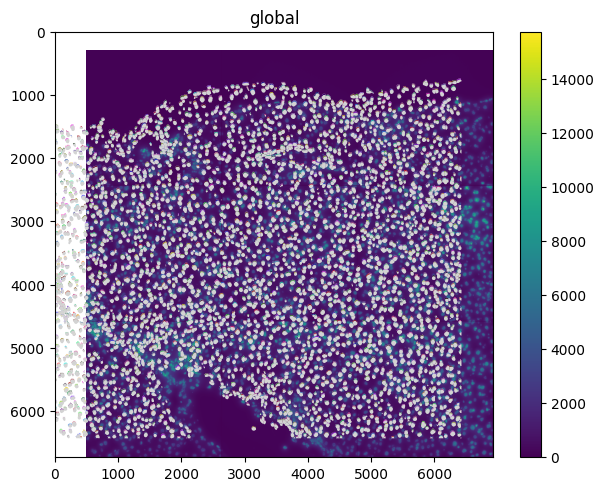

In [12]:
translation = Translation([500, 300], axes=("x", "y"))

set_transformation(sdata.images["raw_image"], translation, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


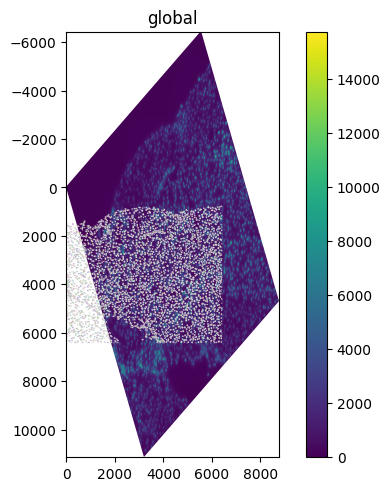

In [14]:
sequence = Sequence([rotation.inverse, scale])

set_transformation(sdata.images["raw_image"], sequence, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

In [ ]:
# most transformations have a FUNCTION.inverse() method that completely reverses it